### Mount the local drive to save the works

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [3]:
#!pip install turicreate
import turicreate

In [4]:
image_train = turicreate.SFrame('/content/MyDrive/MyDrive/SFRAMES/image_train_data/')
image_test = turicreate.SFrame('/content/MyDrive/MyDrive/SFRAMES/image_test_data/')

In [ ]:
image_train['image'].explore()

# **Deep Learning - Images**

In [6]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,
                                                       target = 'label',
                                                       features = ['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.046310  | 1.403423     | 0.329307          | 0.336634            |

| 1         | 9        | 0.972512  | 1.859926     | 0.391807          | 0.445545            |

| 2         | 11       | 0.972512  | 2.155737     | 0.407038          | 0.415842            |

| 3         | 16       | 0.960667  | 2.690840     | 0.442752          | 0.475248            |

| 4         | 22       | 4.618253  | 3.313840     | 0.464286          | 0.495050            |

| 9         | 35       | 6.451534  | 5.057308     | 0.504727          | 0.524752            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

,SArray
0,
1,
2,

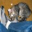
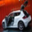
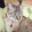

In [7]:
image_test[0:3]['image'].explore()

In [8]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [9]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'cat', 'cat']

In [10]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.44475, 'auc': 0.7089753750000003, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   52  |
 |     dog      |       bird      |  203  |
 |     cat      |    automobile   |   74  |
 |     bird     |       cat       |  296  |
 |  automobile  |       cat       |  276  |
 |     cat      |       bird      |  102  |
 |     bird     |       dog       |  227  |
 |  automobile  |       dog       |  117  |
 |     dog      |       cat       |  297  |
 |     dog      |       dog       |  448  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.4540439191415816, 'log_loss': 1.4190010301456786, 'precision': 0

In [11]:
len(image_train)

2005

In [18]:
#deep_learning_model = turicreate.load_model('http://s3.amazonaws.com/GraphLab-Datasets/deeplearning/imagenet_model_iter45')
#deep_learning_model = turicreate.load_model("resnet-50")
deep_learning_model = turicreate.image_classifier.create(image_train, target='label',model='resnet-50')

Download completed: /var/tmp/model_cache/resnet-50-TuriCreate-6.0.h5
Performing feature extraction on resized images...
Completed   64/2005
Completed  128/2005
Completed  192/2005
Completed  256/2005
Completed  320/2005
Completed  384/2005
Completed  448/2005
Completed  512/2005
Completed  576/2005
Completed  640/2005
Completed  704/2005
Completed  768/2005
Completed  832/2005
Completed  896/2005
Completed  960/2005
Completed 1024/2005
Completed 1088/2005
Completed 1152/2005
Completed 1216/2005
Completed 1280/2005
Completed 1344/2005
Completed 1408/2005
Completed 1472/2005
Completed 1536/2005
Completed 1600/2005
Completed 1664/2005
Completed 1728/2005
Completed 1792/2005
Completed 1856/2005
Completed 1920/2005
Completed 1984/2005
Completed 2005/2005
PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 2048

Number of coefficients      : 6147

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.575813     | 0.614496          | 0.683168            |

| 1         | 5        | 0.500000  | 1.112640     | 0.662290          | 0.683168            |

| 2         | 11       | 1.589513  | 2.290420     | 0.683824          | 0.801980            |

| 3         | 16       | 1.054958  | 3.318596     | 0.693277          | 0.792079            |

| 4         | 17       | 1.054958  | 3.708762     | 0.711134          | 0.772277            |

| 9         | 25       | 0.759254  | 6.095398     | 0.789916          | 0.811881            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [20]:
deep_learning_model.evaluate(image_test)

Performing feature extraction on resized images...
Completed   64/4000
Completed  128/4000
Completed  192/4000
Completed  256/4000
Completed  320/4000
Completed  384/4000
Completed  448/4000
Completed  512/4000
Completed  576/4000
Completed  640/4000
Completed  704/4000
Completed  768/4000
Completed  832/4000
Completed  896/4000
Completed  960/4000
Completed 1024/4000
Completed 1088/4000
Completed 1152/4000
Completed 1216/4000
Completed 1280/4000
Completed 1344/4000
Completed 1408/4000
Completed 1472/4000
Completed 1536/4000
Completed 1600/4000
Completed 1664/4000
Completed 1728/4000
Completed 1792/4000
Completed 1856/4000
Completed 1920/4000
Completed 1984/4000
Completed 2048/4000
Completed 2112/4000
Completed 2176/4000
Completed 2240/4000
Completed 2304/4000
Completed 2368/4000
Completed 2432/4000
Completed 2496/4000
Completed 2560/4000
Completed 2624/4000
Completed 2688/4000
Completed 2752/4000
Completed 2816/4000
Completed 2880/4000
Completed 2944/4000
Completed 3008/4000
Completed

{'accuracy': 0.742,
 'f1_score': 0.7389220668504557,
 'log_loss': 0.6376855147796244,
 'precision': 0.7371221305904829,
 'recall': 0.742,
 'auc': 0.9217474999999999,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 	class	int
 
 Rows: 4004
 
 Data:
 +-----------+--------------------+-----+------+------+-------+
 | threshold |        fpr         | tpr |  p   |  n   | class |
 +-----------+--------------------+-----+------+------+-------+
 |    0.0    |        1.0         | 1.0 | 1000 | 3000 |   0   |
 |   0.001   | 0.9006666666666666 | 1.0 | 1000 | 3000 |   0   |
 |   0.002   | 0.8453333333333334 | 1.0 | 1000 | 3000 |   0   |
 |   0.003   | 0.8036666666666666 | 1.0 | 1000 | 3000 |   0   |
 |   0.004   |       0.766        | 1.0 | 1000 | 3000 |   0   |
 |   0.005   | 0.7346666666666667 | 1.0 | 1000 | 3000 |   0   |
 |   0.006   | 0.7023333333333334 | 1.0 | 1000 | 3000 |   0   |
 |   0.007   | 0.6776666666666666 | 1.0 | 1000 | 3000 |   0   |
 |   0.008   |

In [21]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# **Deep Features Classifier**

In [22]:
deep_features_model = turicreate.logistic_classifier.create(image_train, features=['deep_features'], target = 'label')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.469534     | 0.724790          | 0.683168            |

| 1         | 6        | 0.250000  | 1.117926     | 0.766807          | 0.752475            |

| 2         | 13       | 3.980179  | 2.334356     | 0.780987          | 0.712871            |

| 3         | 15       | 3.412958  | 2.838077     | 0.106618          | 0.118812            |

| 4         | 19       | 0.284460  | 3.635025     | 0.835084          | 0.762376            |

| 9         | 24       | 0.868103  | 5.477539     | 0.898634          | 0.762376            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [23]:
deep_learning_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [25]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [26]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.79325, 'auc': 0.9416544166666674, 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   8   |
 |     dog      |       bird      |   64  |
 |     cat      |    automobile   |   16  |
 |     cat      |       dog       |  211  |
 |     dog      |       dog       |  723  |
 |     cat      |       bird      |  102  |
 |     bird     |       dog       |   49  |
 |  automobile  |       dog       |   7   |
 |     dog      |       cat       |  205  |
 |  automobile  |       cat       |   23  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'f1_score': 0.7935944560576558, 'log_loss': 0.5782380544411253, 'precision': 0

# **Deep Features - Image Retrieval**

In [29]:
#knn_model = turicreate.nearest_neighbor.create(image_train, features=['deep_features'], label='id')
knn_model = turicreate.nearest_neighbors.create(image_train, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [31]:
cat = image_train[18:19]
cat

id,image,label,deep_features,image_array
384,Height: 32 Width: 32,cat,"[1.0440353155136108, 0.0,0.0, 0.0, 0.0, 0.0, ...","[46.0, 45.0, 50.0, 47.0,45.0, 51.0, 45.0, 44.0, ..."


,SArray
0,

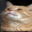

In [33]:
cat['image'].explore()

In [34]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 18.523ms     |

| Done         |         | 100         | 251.031ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [35]:
def get_images_id(query_result):
  return image_train.filter_by(query_result['reference_label'], 'id')

In [36]:
cat_neigbors = get_images_id(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 16.101ms     |

| Done         |         | 100         | 239.507ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

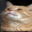
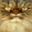
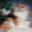
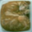
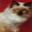

In [37]:
cat_neigbors['image'].explore()

In [38]:
car = image_train[8:9]
car

id,image,label,deep_features,image_array
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."


,SArray
0,

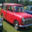

In [39]:
car['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 16.125ms     |

| Done         |         | 100         | 234.803ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

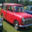
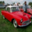
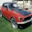
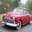
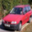

In [40]:
car_neigbors = get_images_id(knn_model.query(car))
car_neigbors['image'].explore()

# **Lambda for kNN images**

In [41]:
show_neighbor = lambda i: get_images_id(knn_model.query(image_train[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 23.54ms      |

| Done         |         | 100         | 233.618ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

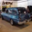
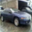
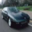
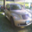
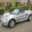

In [42]:
show_neighbor(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 19.184ms     |

| Done         |         | 100         | 230.722ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

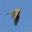
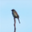
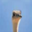
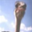
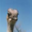

In [44]:
show_neighbor(1222)